In [1]:
from numpy import *
from pylab import *
import scipy
from scipy.integrate import quad as integrate

In [2]:
x = linspace(0,1,1025)

In [3]:
def my_fun(x):
    return abs(x-.5)

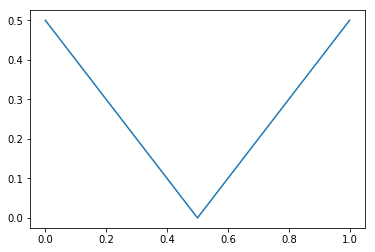

In [4]:
plot(x,my_fun(x))

In [5]:
n = 17
M = zeros((n,n))
## Hilbert matrix
for i in range(n):
    for j in range(n):
        M[i,j] = 1/(i+j+1)

In [6]:
F = array([integrate(lambda x: my_fun(x)*x**i,0,1)[0] for i in range(n)]) #[1] is the error

In [7]:
c = linalg.solve(M,F)

In [8]:
p = sum([c[i]*x**i for i in range(n)],axis=0)

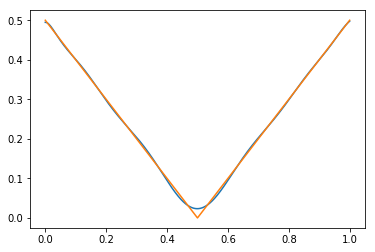

In [9]:
plot(x,p)
plot(x,my_fun(x))

In [10]:
from numpy.polynomial.legendre import leggauss
from numpy.polynomial.legendre import Legendre

In [11]:
n=50
N=2*n
q,w = leggauss(N) ## these are correct only for [-1,1]
## rescale for [0,1]
q = .5*(q+1)
w = .5*w

In [12]:
v = array([Legendre.basis(i,domain=[0,1])(x) for i in range(n)])
vq = array([Legendre.basis(i,domain=[0,1])(q) for i in range(n)])
vq.shape

(50, 100)

In [13]:
## compute the norms
norms = einsum('ij,ij,j->i',vq,vq,w)

In [14]:
## do the quadrature integral
ci = einsum('ij,j,j->i',vq,my_fun(q),w)/norms

In [15]:
p = einsum('i,ij->j',ci,v)

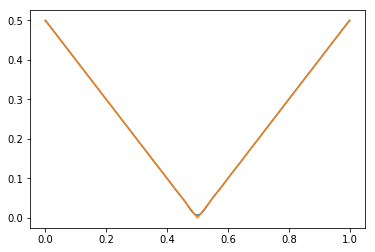

In [16]:
plot(x,p)
plot(x,my_fun(x))

In [162]:
## I compute simple integrals
#N = 100000
#x = linspace(0,1,N+1)
F=[sin,exp]
sol=[cos(0)-cos(1),e-1]
#h = 1/N;
#sol[1]

In [166]:
def lep_quad(func,N):
    res = 0.
    h = 1/N
    for i in range(N):
        res += func[i]
    res *= h
    return res

def mp_quad(func,N):
    res = 0.
    h = 1/N
    for i in range(N):
        res += (func[i+1]+func[i])
    res *= h*0.5
    return res

In [182]:
def error(func,sol):
    errors = zeros((2,5))
    for p in range(3,8):
        N = 10**p
        x = linspace(0,1,N+1)
        obj1 = mp_quad(func(x),N)
        obj2 = lep_quad(func(x),N)
        errors[0][p-3]=abs(obj1-sol)
        errors[1][p-3]=abs(obj2-sol)
    return errors

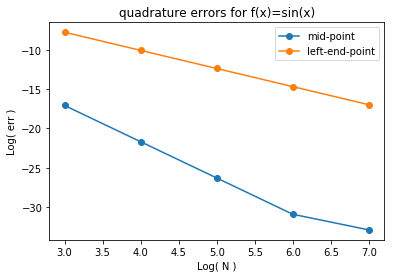

In [209]:
import matplotlib.pyplot as plt
arr=error(F[0],sol[0])
plt.plot(range(3,8),log(arr[0]),marker='o',label='mid-point')
plt.plot(range(3,8),log(arr[1]),marker='o',label='left-end-point')
plt.legend()
plt.xlabel('Log( N )')
plt.ylabel('Log( err )')
plt.title('quadrature errors for f(x)=sin(x)')
plt.show()

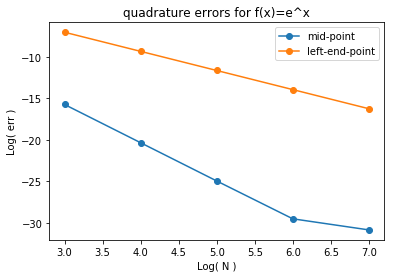

In [210]:
arr=error(F[1],sol[1])
plt.plot(range(3,8),log(arr[0]),marker='o',label='mid-point')
plt.plot(range(3,8),log(arr[1]),marker='o',label='left-end-point')
plt.legend()
plt.xlabel('Log( N )')
plt.ylabel('Log( err )')
plt.title('quadrature errors for f(x)=e^x')
plt.show()